<a href="https://colab.research.google.com/github/Juricasfi/IA/blob/main/Clasificador_Lineal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf

Generar dos conjuntos de datos linealmente separables con la misma covarianza pero una media diferente para distinguir los dos conjuntos de datos

(Distribución normal)

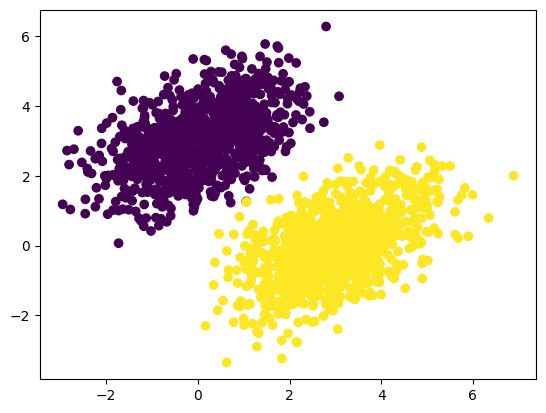

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3],
                                                 cov = [[1, 0.5], [0.5, 1]],
                                                 size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov = [[1, 0.5], [0.5, 1]],
                                                 size = num_samples_per_class)

#apilar los dos arreglos

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generar las etiquetas de destino (target labels)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype ="float32")))

#plot

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Crear el clasificador lineal el cual es una affine transformation
reduct = w*input+b

Loss at step 0: 2.2021
Loss at step 1: 0.2165
Loss at step 2: 0.1206
Loss at step 3: 0.1014
Loss at step 4: 0.0933
Loss at step 5: 0.0872
Loss at step 6: 0.0818
Loss at step 7: 0.0769
Loss at step 8: 0.0724
Loss at step 9: 0.0683
Loss at step 10: 0.0646
Loss at step 11: 0.0612
Loss at step 12: 0.0580
Loss at step 13: 0.0552
Loss at step 14: 0.0526
Loss at step 15: 0.0502
Loss at step 16: 0.0480
Loss at step 17: 0.0460
Loss at step 18: 0.0442
Loss at step 19: 0.0425
Loss at step 20: 0.0410
Loss at step 21: 0.0396
Loss at step 22: 0.0383
Loss at step 23: 0.0371
Loss at step 24: 0.0361
Loss at step 25: 0.0351
Loss at step 26: 0.0342
Loss at step 27: 0.0334
Loss at step 28: 0.0326
Loss at step 29: 0.0320
Loss at step 30: 0.0313
Loss at step 31: 0.0308
Loss at step 32: 0.0303
Loss at step 33: 0.0298
Loss at step 34: 0.0293
Loss at step 35: 0.0289
Loss at step 36: 0.0286
Loss at step 37: 0.0282
Loss at step 38: 0.0279
Loss at step 39: 0.0277


<function matplotlib.pyplot.show(close=None, block=None)>

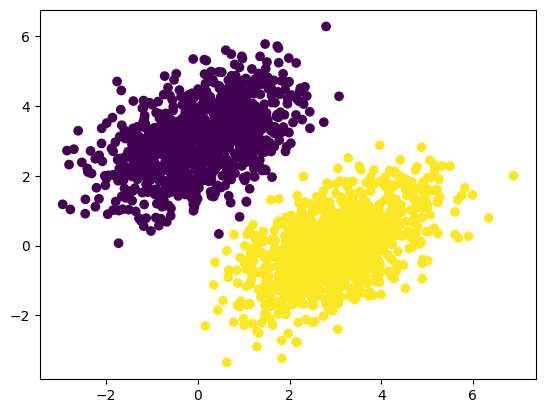

In [5]:
input_dim = 2
output_dim =1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))


#  Forward pass function

def model(inputs) :
  return tf.matmul(inputs, W) + b

# loss function

def square_loss(targets,predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Entrenamiento
## Toma los datos de entrada y actualiza los pesos y b para minimizar el error

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss


# ejecutar el entrenamiento por lotes

for step in range(40):
  loss = training_step(inputs,targets)
  print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show

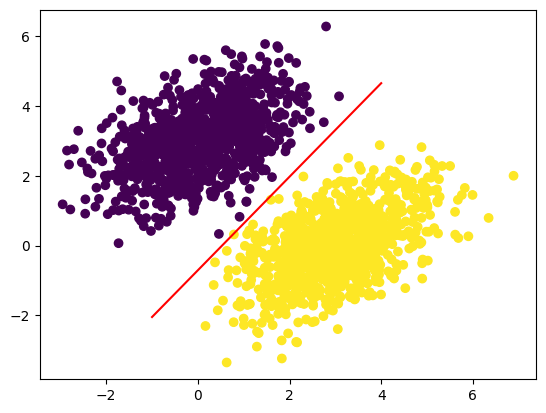

In [7]:
x =np.linspace(-1,4,100)
y =-W[0]/W[1] *x + (0.5-b)/W[1]
plt.plot(x,y,"red")
plt.scatter(inputs[:,0], inputs[:,1],c=predictions[:,0]>0.5)